# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing

data = pd.read_csv("/content/train_house.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
#data.drop(['Alley','PoolQC'], axis=1, inplace=True)

In [ ]:
# Drop variabel NaN
data = data.dropna(axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Memisahkan data menjadi numerikal & kategorikal
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Data numerik
df_num = data.select_dtypes(include=numerics)

# Data kategorikal
df_cat = data.drop(columns = df_num.columns, axis = 1)

In [ ]:
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

<Axes: ylabel='Utilities'>

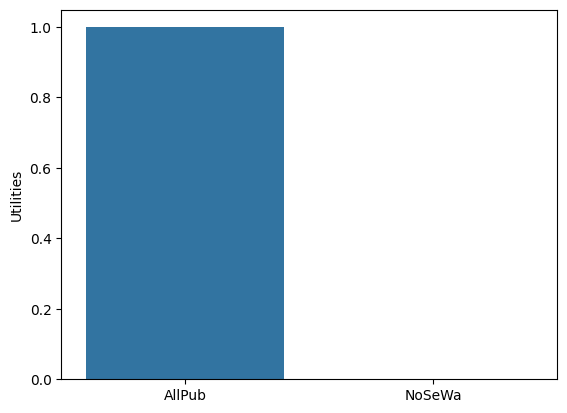

In [ ]:
sns.barplot(x=df_cat['Utilities'].value_counts().index,
            y=df_cat['Utilities'].value_counts(normalize=True))

In [ ]:
df_cat['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: ylabel='HouseStyle'>

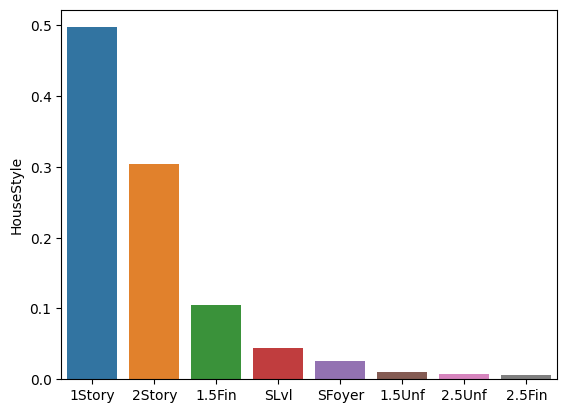

In [ ]:
sns.barplot(x=df_cat['HouseStyle'].value_counts().index,
            y=df_cat['HouseStyle'].value_counts(normalize=True))

In [ ]:
df_cat['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: ylabel='ExterQual'>

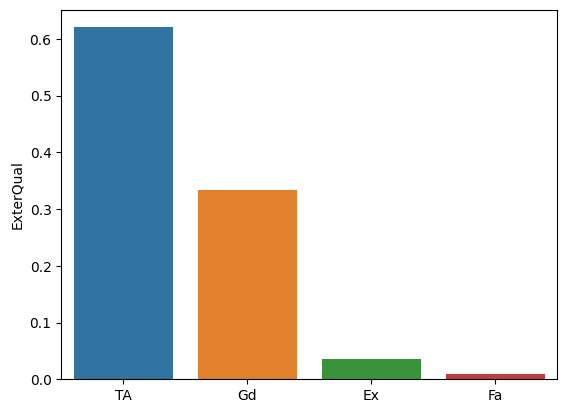

In [ ]:
sns.barplot(x=df_cat['ExterQual'].value_counts().index,
            y=df_cat['ExterQual'].value_counts(normalize=True))

In [ ]:
df_cat['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

#### **Analisis tentang variabel kategorikal**

* [*data telihat imbalanced*]
* [*Fasilitas yang tersedia hampir semua adalah AllPub*]
* [*Type rumah kebanyakan bertype 1Story*]
* [*kualitas material eksterior kebanyakan menggunakan TA(Average/Typical)*]

Pertanyaan :
* [*Kenapa fasilitas yang tersedia hampir semua AllPub?*]
* [*Apakah memang masyarakat memang suka type rumah 1Story?*]
* [*Kenapa masyarakat lebih banyak menggunakan kualitas material eksterior TA?*]


## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

median : 163000.0
mean : 180921.19589041095
std dev : 79442.50288288662


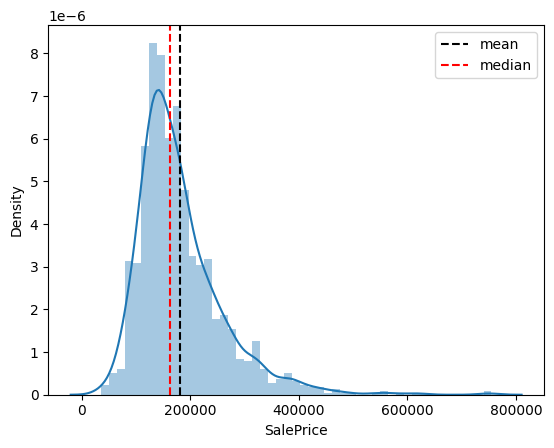

In [ ]:
x = df_num['SalePrice']
sns.distplot(x,axlabel=x.name)
line1 = plt.axvline(x.mean(),color='k',linestyle='--',label='mean')
line2 = plt.axvline(x.median(),color='r',linestyle='--',label='median')
firat_legend = plt.legend(handles=[line1,line2],loc=1)
print('median :',x.median())
print('mean :',x.mean())
print('std dev :',x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* [*Distribusi right-skewed*]
* [*Kebanyakan data berada dalam range 100,000 sampai 300,000. Apakah harga itu wajar?*]

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

median : 1464.0
mean : 1515.463698630137
std dev : 525.4803834232025


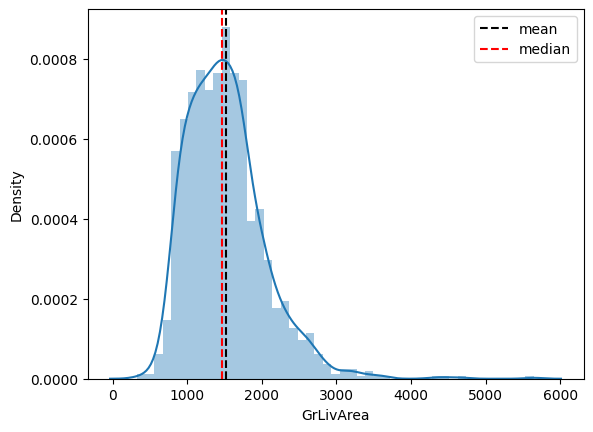

In [ ]:
x = df_num['GrLivArea']
sns.distplot(x,axlabel=x.name)
line1 = plt.axvline(x.mean(),color='k',linestyle='--',label='mean')
line2 = plt.axvline(x.median(),color='r',linestyle='--',label='median')
firat_legend = plt.legend(handles=[line1,line2],loc=1)
print('median :',x.median())
print('mean :',x.mean())
print('std dev :',x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* [*Distribusi right-skewed*]
* [*Kebanyakan data berada dalam range 1,000 sampai 3,000. Apakah luas itu wajar?*]

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

median : 480.0
mean : 472.9801369863014
std dev : 213.80484145338042


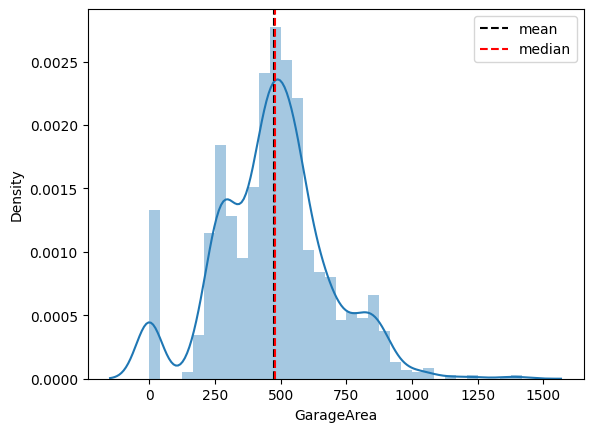

In [ ]:
x = df_num['GarageArea']
sns.distplot(x,axlabel=x.name)
line1 = plt.axvline(x.mean(),color='k',linestyle='--',label='mean')
line2 = plt.axvline(x.median(),color='r',linestyle='--',label='median')
firat_legend = plt.legend(handles=[line1,line2],loc=1)
print('median :',x.median())
print('mean :',x.mean())
print('std dev :',x.std())
plt.show()

In [ ]:
print('number of nonzero values: ',np.sum(df_num['GarageArea']!=0))
print('number of zero values: ',np.sum(df_num['GarageArea']==0))

number of nonzero values:  1379
number of zero values:  81


#### **Analisis tentang variabel `GarageArea`**

* [*Distribusi right-skewed*]
* [*Kebanyakan data berada dalam range 400 sampai 600. Apakah luas garasi itu wajar?*]
* [*Terlihat terdapat nilai di angka 0*]

## Pemrosesan Data Variabel Numerikal

median : 5.212187604403958
mean : 5.221978956475628
std dev : 0.17347974217176834


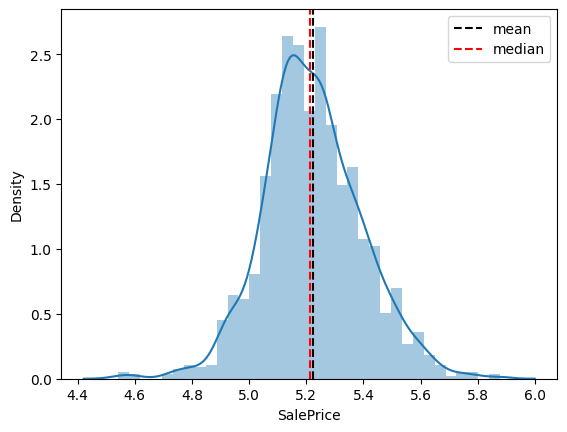

In [ ]:
# Transformasi log-10 SalePrice

x = np.log10(df_num['SalePrice'])
sns.distplot(x,axlabel=x.name)
line1 = plt.axvline(x.mean(),color='k',linestyle='--',label='mean')
line2 = plt.axvline(x.median(),color='r',linestyle='--',label='median')
firat_legend = plt.legend(handles=[line1,line2],loc=1)
print('median :',x.median())
print('mean :',x.mean())
print('std dev :',x.std())
plt.show()

median : 3.165541076722373
mean : 3.156354310389778
std dev : 0.14485910869663862


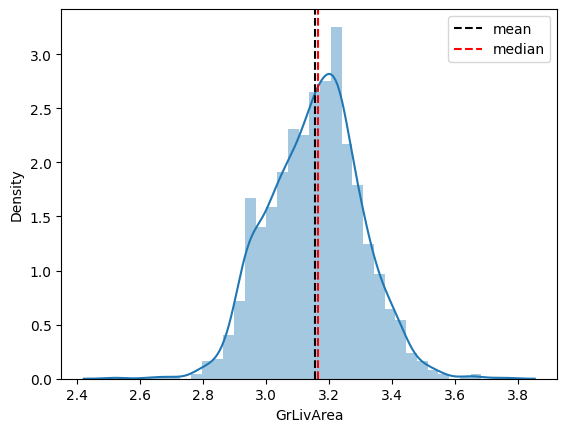

In [ ]:
# Transformasi log-10 GrLivArea

x = np.log10(df_num['GrLivArea'])
sns.distplot(x,axlabel=x.name)
line1 = plt.axvline(x.mean(),color='k',linestyle='--',label='mean')
line2 = plt.axvline(x.median(),color='r',linestyle='--',label='median')
firat_legend = plt.legend(handles=[line1,line2],loc=1)
print('median :',x.median())
print('mean :',x.mean())
print('std dev :',x.std())
plt.show()

median : 484.0
mean : 500.76214648295866
std dev : 185.68051979433164


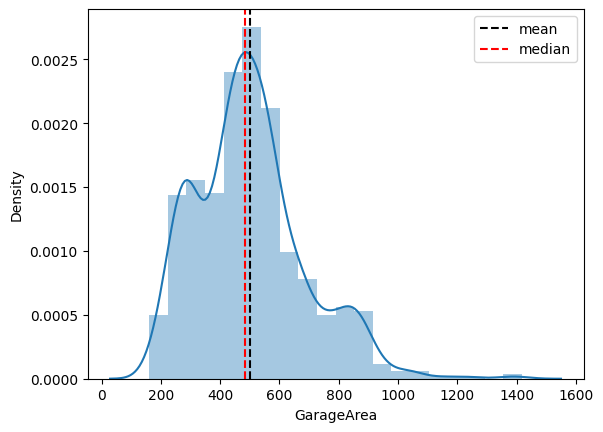

In [ ]:
# Menghilangkan nilai nol pada GarageArea

x = df_num['GarageArea'][df_num['GarageArea']!=0]
sns.distplot(x,axlabel=x.name,bins=20)
line1 = plt.axvline(x.mean(),color='k',linestyle='--',label='mean')
line2 = plt.axvline(x.median(),color='r',linestyle='--',label='median')
firat_legend = plt.legend(handles=[line1,line2],loc=1)
print('median :',x.median())
print('mean :',x.mean())
print('std dev :',x.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* [*Pada data 'SalePrice' dan 'GrLivArea' setalah dilakukan log10 menjadi lebih baik*]
* [*Sedangkan data 'GarageArea' setalah dilakukan penghapusan nilai 0 menjadi lebih baik*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

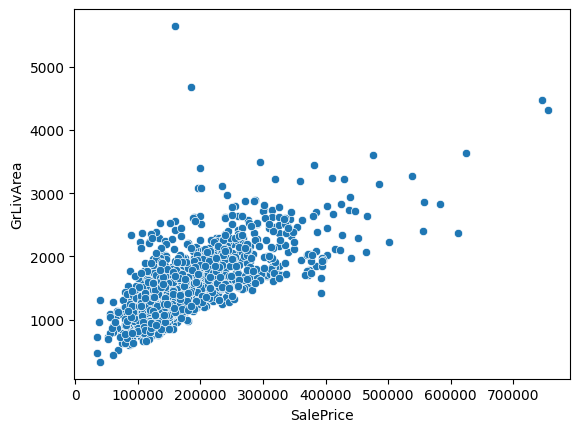

In [ ]:
ax = sns.scatterplot(y='GrLivArea',x='SalePrice', data=df_num)
plt.show()

# `GarageArea` dengan `SalePrice`

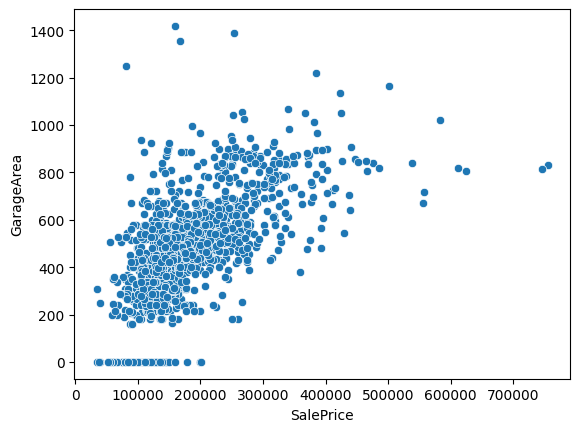

In [ ]:
ax = sns.scatterplot(y='GarageArea',x='SalePrice', data=df_num)
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* [*Semakin luas bangunan harga akan semakin tinggi*]
* [*Semakin luas garasi harga akan semakin tinggi*]
* [*Berdasarkan diagram diatas, terlihat ke 2 tabel itu saling berhubungan*]